# <center>ITS307 Data Analytics : Autumn Semester 2022</center>

# <center>Practical 5 - 12200075</center>

# <center>Feature Engineering</center>

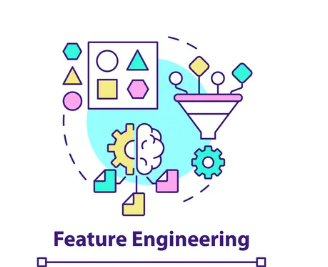

# Table of Contents 
<ol start="0">
<li> Learning Objectives </li>
<li> Imputing Numerical Features </li>
<li> Detecting Outlier</li>
<li> Feature Transformation</li>
<li> Feature Scaling </li>
<li> Working with Categorical Features </li>
<li> Combine Features</li>
</ol>

## 0. Learning Objectives

Implement Numerical feature engineering techniques such as outlier detection, feature transformation, and feature scaling.

By the end of the lab, you should be able to :
- Apply required feature engineering techniques to given dataset.


- Prepare features for traning machine learning model.

# 1. Imputing Numerical  Features using sklearn

Instructions:

- Load data from loan_train.csv file. Create a dataframe names `ndf` which contains only numerical features. Default datatype of `Dependents` feature is `object`. Do you think it should be numerical feature? Justify your answer.


- Use sklearn SimpleImputer to Impute the missing values using most suitable strategy.



In [1]:
# Write your solution here
import pandas as pd

df = pd.read_csv('loan_train.csv')
df

Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN             360.0   
1               4583             1508.0       128.0             360.0   
2               3000                0.0        66.0             360.0   
3               2583             2358.0       120.0             360.0   
4               6000                0.0       141.0             360.0   
..               ...                ...         ...               ...   
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History Property_Area Loan_Status  
0               1.0         Urban           Y  
1               1.0         Rural           N  
2               1.0         Urban           Y  
3               1.0         Urban           Y  
4               1.0         Urban           Y  
..              ...           ...         ...  
609             1.0         Rural           Y  
610             1.0         Rural           Y  
611             1.0         Urban           Y  
612             1.0         Urban           Y  
613             0.0     Semiurban           N  

[614 rows x 13 columns]

In [2]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [3]:
dt = df.select_dtypes(include = ['number'])
dt.isna().sum()

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
dtype: int64

In [4]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy = 'mean')
ndf = imp.fit_transform(dt)
ndf

array([[5.84900000e+03, 0.00000000e+00, 1.46412162e+02, 3.60000000e+02,
        1.00000000e+00],
       [4.58300000e+03, 1.50800000e+03, 1.28000000e+02, 3.60000000e+02,
        1.00000000e+00],
       [3.00000000e+03, 0.00000000e+00, 6.60000000e+01, 3.60000000e+02,
        1.00000000e+00],
       ...,
       [8.07200000e+03, 2.40000000e+02, 2.53000000e+02, 3.60000000e+02,
        1.00000000e+00],
       [7.58300000e+03, 0.00000000e+00, 1.87000000e+02, 3.60000000e+02,
        1.00000000e+00],
       [4.58300000e+03, 0.00000000e+00, 1.33000000e+02, 3.60000000e+02,
        0.00000000e+00]])

In [5]:
ndf= pd.DataFrame(data = ndf, columns = dt.columns)
ndf.isna().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

# 2. Outlier Detection

Instructions:

- Choose any one numerical feature and check if there is any outliers.


- Use both inter quartile range method and standard deviation method to remove outliers in the dataset.

In [6]:
import matplotlib.pyplot as plt

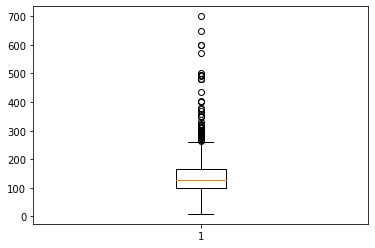

In [7]:
#Write your solution here
plt.boxplot(ndf['LoanAmount'])
plt.show()

In [20]:
ndf.shape

(614, 5)

In [8]:
Q1 = ndf['LoanAmount'].quantile(0.25)
Q1

100.25

In [9]:
Q3 = ndf['LoanAmount'].quantile(0.75)
Q3

164.75

In [10]:
IQR = Q3-Q1
IQR

64.5

In [11]:
Upper_limit = Q3+(IQR*1.5)
Upper_limit

261.5

In [12]:
Lower_limit = Q1-(IQR*1.5)
Lower_limit

3.5

In [13]:
ndf1 = ndf[(ndf.LoanAmount > Lower_limit) & (ndf.LoanAmount < Upper_limit)]
ndf1

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849.0                0.0  146.412162             360.0   
1             4583.0             1508.0  128.000000             360.0   
2             3000.0                0.0   66.000000             360.0   
3             2583.0             2358.0  120.000000             360.0   
4             6000.0                0.0  141.000000             360.0   
..               ...                ...         ...               ...   
609           2900.0                0.0   71.000000             360.0   
610           4106.0                0.0   40.000000             180.0   
611           8072.0              240.0  253.000000             360.0   
612           7583.0                0.0  187.000000             360.0   
613           4583.0                0.0  133.000000             360.0   

     Credit_History  
0               1.0  
1               1.0  
2               1.0  
3               1.0  
4               1.0  
..              ...  
609             1.0  
610             1.0  
611             1.0  
612             1.0  
613             0.0  

[573 rows x 5 columns]

In [19]:
ndf1.shape

(573, 5)

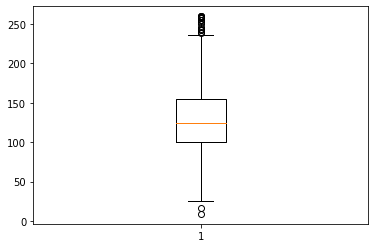

In [14]:
plt.boxplot(ndf1['LoanAmount'])
plt.show()

In [15]:
# Using standard deviation
ndf1.shape

(573, 5)

In [16]:
std = df.Loan_Amount_Term.std()
std

65.12040985461256

In [17]:
mean = df.Loan_Amount_Term.mean()
mean

342.0

In [21]:
Upper_limit = mean + (3 * std)
Upper_limit

537.3612295638377

In [22]:
Lower_limit = mean - (3 * std)
Lower_limit

146.6387704361623

In [23]:
ndf1 = ndf1[(ndf1.Loan_Amount_Term > Lower_limit) & (ndf1.Loan_Amount_Term < Upper_limit)]
ndf1.shape

(561, 5)

## 3. Feature Transformation

Instructions:

- Use an appropriate graph to explore the distribution of each numeric feature. 



- Choose any one feature that needs to apply feature transformation. Apply each feature transformation technique and justify which feature transformation technique is suitable for the chosen feature.

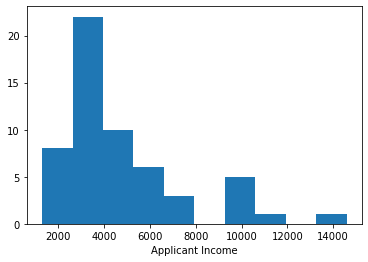

In [17]:
# Write your solution here
plt.hist(ndf1.ApplicantIncome)
plt.xlabel('Applicant Income')
plt.show()

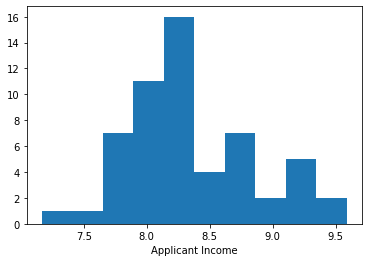

In [18]:
#Logarithmic Transformation
import numpy as np
x = np.log(ndf1.ApplicantIncome)
plt.hist(x)
plt.xlabel("Applicant Income")
plt.show()

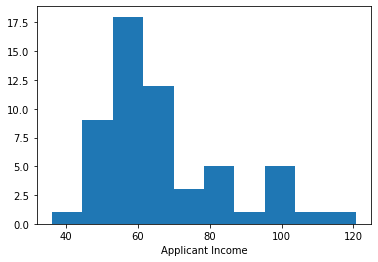

In [19]:
# Squareroot Transformation
x= np.sqrt(ndf1.ApplicantIncome)
plt.hist(x)
plt.xlabel("Applicant Income")
plt.show()

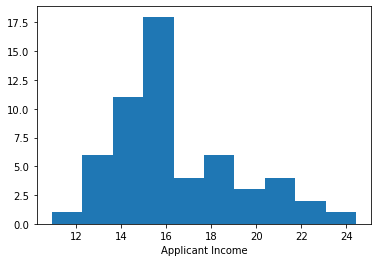

In [20]:
# Cuberoot Transformation
x = np.cbrt(ndf1.ApplicantIncome)
plt.hist(x)
plt.xlabel("Applicant Income")
plt.show()

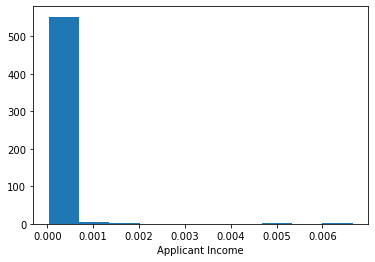

In [42]:
# Reciprocal Transformation
x= np.reciprocal(ndf1.ApplicantIncome)
plt.hist(x)
plt.xlabel("Applicant Income")
plt.show()

C:\Users\sawad\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


ValueError: supplied range of [inf, inf] is not finite

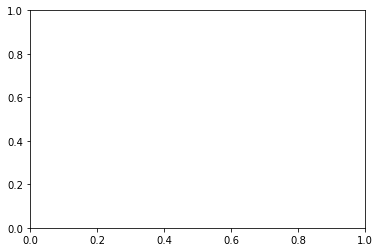

In [21]:
# Exponentiation Transformation
x= np.exp(ndf1.ApplicantIncome)
plt.hist(x)
plt.xlabel("Applicant Income")
plt.show()

## 4. Feature Scaling

Instructions:


- Use all feature scaling techniques to scale all the numerical features in the given datasets and observe the difference in the scaled features when you use different scaling techniques.


In [23]:
# Write your solution here
# Max - Min Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
ndf1 = scaler.fit_transform(ndf)
ndf1 = pd.DataFrame(ndf1, columns = dt.columns)
ndf1.head()


ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0         0.070489           0.000000    0.198860           0.74359   
1         0.054830           0.036192    0.172214           0.74359   
2         0.035250           0.000000    0.082489           0.74359   
3         0.030093           0.056592    0.160637           0.74359   
4         0.072356           0.000000    0.191027           0.74359   

   Credit_History  
0             1.0  
1             1.0  
2             1.0  
3             1.0  
4             1.0

In [24]:
# Standard Scalar
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
ndf2 = scaler.fit_transform(ndf1)
ndf2 = pd.DataFrame(ndf2, columns = dt.columns)
ndf2.head()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0         0.072991          -0.554487    0.000000          0.279851   
1        -0.134412          -0.038732   -0.219273          0.279851   
2        -0.393747          -0.554487   -0.957641          0.279851   
3        -0.462062           0.251980   -0.314547          0.279851   
4         0.097728          -0.554487   -0.064454          0.279851   

   Credit_History  
0         0.45164  
1         0.45164  
2         0.45164  
3         0.45164  
4         0.45164

## 5. Categorical features


Instructions:


- Get all your categorical data in a new dataframe `cdf`. Refer your last class work on feature engineering on categorical features to make your categorical features ready for tranning machine learning model.

In [27]:
# Write your solution here
df = pd.read_csv('Loan_train.csv')
df

Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN             360.0   
1               4583             1508.0       128.0             360.0   
2               3000                0.0        66.0             360.0   
3               2583             2358.0       120.0             360.0   
4               6000                0.0       141.0             360.0   
..               ...                ...         ...               ...   
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History Property_Area Loan_Status  
0               1.0         Urban           Y  
1               1.0         Rural           N  
2               1.0         Urban           Y  
3               1.0         Urban           Y  
4               1.0         Urban           Y  
..              ...           ...         ...  
609             1.0         Rural           Y  
610             1.0         Rural           Y  
611             1.0         Urban           Y  
612             1.0         Urban           Y  
613             0.0     Semiurban           N  

[614 rows x 13 columns]

In [28]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [29]:
cdf = df.select_dtypes(include = ['object'])
cdf

Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

    Property_Area Loan_Status  
0           Urban           Y  
1           Rural           N  
2           Urban           Y  
3           Urban           Y  
4           Urban           Y  
..            ...         ...  
609         Rural           Y  
610         Rural           Y  
611         Urban           Y  
612         Urban           Y  
613     Semiurban           N  

[614 rows x 8 columns]

In [30]:
cdf.drop(['Loan_ID'], axis = 1, inplace = True)
cdf

Gender Married Dependents     Education Self_Employed Property_Area  \
0      Male      No          0      Graduate            No         Urban   
1      Male     Yes          1      Graduate            No         Rural   
2      Male     Yes          0      Graduate           Yes         Urban   
3      Male     Yes          0  Not Graduate            No         Urban   
4      Male      No          0      Graduate            No         Urban   
..      ...     ...        ...           ...           ...           ...   
609  Female      No          0      Graduate            No         Rural   
610    Male     Yes         3+      Graduate            No         Rural   
611    Male     Yes          1      Graduate            No         Urban   
612    Male     Yes          2      Graduate            No         Urban   
613  Female      No          0      Graduate           Yes     Semiurban   

    Loan_Status  
0             Y  
1             N  
2             Y  
3             Y  
4             Y  
..          ...  
609           Y  
610           Y  
611           Y  
612           Y  
613           N  

[614 rows x 7 columns]

In [31]:
cdf.isna().sum()

Gender           13
Married           3
Dependents       15
Education         0
Self_Employed    32
Property_Area     0
Loan_Status       0
dtype: int64

In [33]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy = 'most_frequent')
data = imp.fit_transform(cdf)
data

array([['Male', 'No', '0', ..., 'No', 'Urban', 'Y'],
       ['Male', 'Yes', '1', ..., 'No', 'Rural', 'N'],
       ['Male', 'Yes', '0', ..., 'Yes', 'Urban', 'Y'],
       ...,
       ['Male', 'Yes', '1', ..., 'No', 'Urban', 'Y'],
       ['Male', 'Yes', '2', ..., 'No', 'Urban', 'Y'],
       ['Female', 'No', '0', ..., 'Yes', 'Semiurban', 'N']], dtype=object)

In [36]:
cdf = pd.DataFrame(data, columns = cdf.columns)
cdf.isna().sum()

Gender           0
Married          0
Dependents       0
Education        0
Self_Employed    0
Property_Area    0
Loan_Status      0
dtype: int64

In [38]:
# One Hot Encoder
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()

result = ohe.fit_transform(cdf[['Gender', 'Married', 'Self_Employed']]).toarray()
result

array([[0., 1., 1., 0., 1., 0.],
       [0., 1., 0., 1., 1., 0.],
       [0., 1., 0., 1., 0., 1.],
       ...,
       [0., 1., 0., 1., 1., 0.],
       [0., 1., 0., 1., 1., 0.],
       [1., 0., 1., 0., 0., 1.]])

In [39]:
cols = ohe.get_feature_names_out()
cols

array(['Gender_Female', 'Gender_Male', 'Married_No', 'Married_Yes',
       'Self_Employed_No', 'Self_Employed_Yes'], dtype=object)

In [40]:
nodf = pd.DataFrame(result, columns = cols)
nodf.head()

Gender_Female  Gender_Male  Married_No  Married_Yes  Self_Employed_No  \
0            0.0          1.0         1.0          0.0               1.0   
1            0.0          1.0         0.0          1.0               1.0   
2            0.0          1.0         0.0          1.0               0.0   
3            0.0          1.0         0.0          1.0               1.0   
4            0.0          1.0         1.0          0.0               1.0   

   Self_Employed_Yes  
0                0.0  
1                0.0  
2                1.0  
3                0.0  
4                0.0

In [53]:
# Ordinal 
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()

cdf[['Property_Area','Education']] = oe.fit_transform(cdf[['Education', 'Property_Area']])

In [46]:
odf = pd.DataFrame(cdf)
odf

Gender Married Dependents     Education Self_Employed Property_Area  \
0      Male      No          0      Graduate            No         Urban   
1      Male     Yes          1      Graduate            No         Rural   
2      Male     Yes          0      Graduate           Yes         Urban   
3      Male     Yes          0  Not Graduate            No         Urban   
4      Male      No          0      Graduate            No         Urban   
..      ...     ...        ...           ...           ...           ...   
609  Female      No          0      Graduate            No         Rural   
610    Male     Yes         3+      Graduate            No         Rural   
611    Male     Yes          1      Graduate            No         Urban   
612    Male     Yes          2      Graduate            No         Urban   
613  Female      No          0      Graduate           Yes     Semiurban   

    Loan_Status  
0             Y  
1             N  
2             Y  
3             Y  
4             Y  
..          ...  
609           Y  
610           Y  
611           Y  
612           Y  
613           N  

[614 rows x 7 columns]

In [49]:
cdf = pd.concat([nodf,odf], axis=1)
cdf.drop(['Gender','Married','Self_Employed'], axis=1, inplace=True)
cdf

Gender_Female  Gender_Male  Married_No  Married_Yes  Self_Employed_No  \
0              0.0          1.0         1.0          0.0               1.0   
1              0.0          1.0         0.0          1.0               1.0   
2              0.0          1.0         0.0          1.0               0.0   
3              0.0          1.0         0.0          1.0               1.0   
4              0.0          1.0         1.0          0.0               1.0   
..             ...          ...         ...          ...               ...   
609            1.0          0.0         1.0          0.0               1.0   
610            0.0          1.0         0.0          1.0               1.0   
611            0.0          1.0         0.0          1.0               1.0   
612            0.0          1.0         0.0          1.0               1.0   
613            1.0          0.0         1.0          0.0               0.0   

     Self_Employed_Yes Dependents  Education  Property_Area Loan_Status  
0                  0.0          0        2.0            0.0           Y  
1                  0.0          1        0.0            0.0           N  
2                  1.0          0        2.0            0.0           Y  
3                  0.0          0        2.0            1.0           Y  
4                  0.0          0        2.0            0.0           Y  
..                 ...        ...        ...            ...         ...  
609                0.0          0        0.0            0.0           Y  
610                0.0         3+        0.0            0.0           Y  
611                0.0          1        2.0            0.0           Y  
612                0.0          2        2.0            0.0           Y  
613                1.0          0        1.0            0.0           N  

[614 rows x 10 columns]

## 6. Combine Features

Instructions:

- Create a new dataframe `alldf` which contains transformed categorical and numerical features ready for traning machine learning model.

In [56]:
#Write your solution here
alldf = pd.concat([ndf, cdf], axis = 1)
alldf.isna().sum()


ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Gender_Female        0
Gender_Male          0
Married_No           0
Married_Yes          0
Self_Employed_No     0
Self_Employed_Yes    0
Dependents           0
Education            0
Property_Area        0
Loan_Status          0
dtype: int64

In [57]:
alldf.head()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0           5849.0                0.0  146.412162             360.0   
1           4583.0             1508.0  128.000000             360.0   
2           3000.0                0.0   66.000000             360.0   
3           2583.0             2358.0  120.000000             360.0   
4           6000.0                0.0  141.000000             360.0   

   Credit_History  Gender_Female  Gender_Male  Married_No  Married_Yes  \
0             1.0            0.0          1.0         1.0          0.0   
1             1.0            0.0          1.0         0.0          1.0   
2             1.0            0.0          1.0         0.0          1.0   
3             1.0            0.0          1.0         0.0          1.0   
4             1.0            0.0          1.0         1.0          0.0   

   Self_Employed_No  Self_Employed_Yes Dependents  Education  Property_Area  \
0               1.0                0.0          0        0.0            2.0   
1               1.0                0.0          1        0.0            0.0   
2               0.0                1.0          0        0.0            2.0   
3               1.0                0.0          0        1.0            2.0   
4               1.0                0.0          0        0.0            2.0   

  Loan_Status  
0           Y  
1           N  
2           Y  
3           Y  
4           Y

# <center>THANK YOU